In [7]:
import matplotlib.pyplot as plt
from dataset_class import DynamicMVTecDataset
import random
import torchvision.transforms as T

In [8]:
transforms = T.Compose([
            T.Resize((256, 256)),
            T.ToTensor(),
        ])

In [9]:
def visualize_samples(dataset, num_samples=4):
    """
    Visualize random samples with their corresponding masks from the dataset.

    Parameters:
    - dataset: The dataset object.
    - num_samples: Number of random samples to visualize.
    """
    indices = random.sample(range(len(dataset)), num_samples)

    for i, idx in enumerate(indices):
        try:
            sample = dataset[idx]
            if sample is None:
                print(f"[INFO] Skipping invalid sample at index {idx}")
                continue
            # Get the image, mask, and label
            image, mask, label = dataset[idx]

            # Convert tensors to numpy arrays for visualization
            if hasattr(image, 'numpy'):
                # Rearrange channels for visualization
                image = image.permute(1, 2, 0).numpy()  
            if hasattr(mask, 'numpy'):
                mask = mask.squeeze().numpy()
                
            # Plot the image and mask
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
            plt.title(f"Image (Label: {label})")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(mask, cmap='gray')
            plt.title("Mask")
            plt.axis('off')

            plt.tight_layout()
            plt.show()

        except ValueError as e:
            print(f"Error visualizing sample at index {idx}: {e}")
            continue  # Skip to the next sample



In [10]:

dataset = DynamicMVTecDataset(
    good_image_dir="../../datasets/mvtec/bottle/train/good/",
    transform=transforms,
    include_scar=True
)

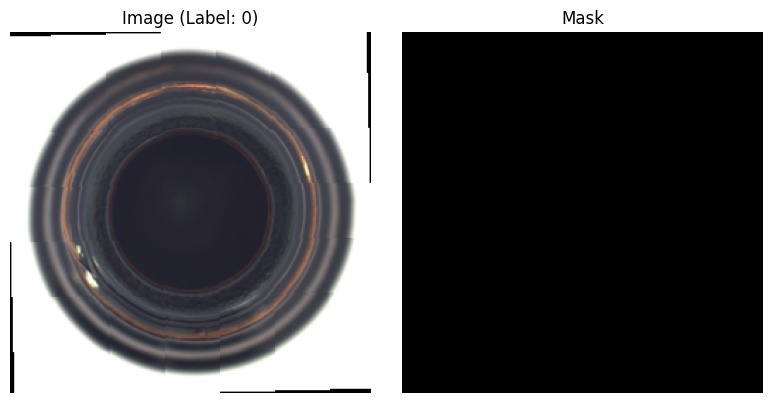

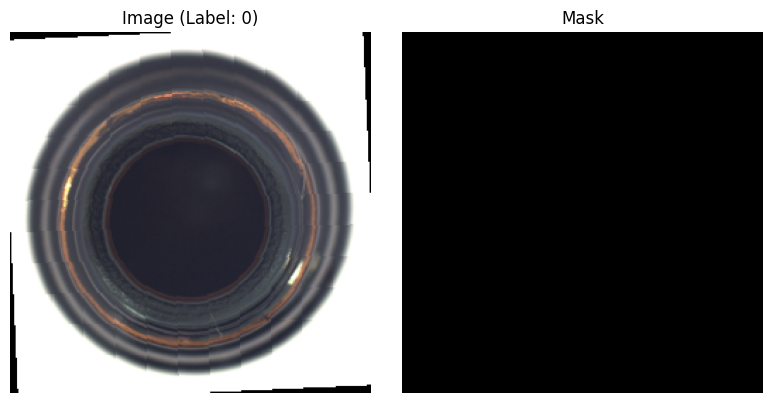

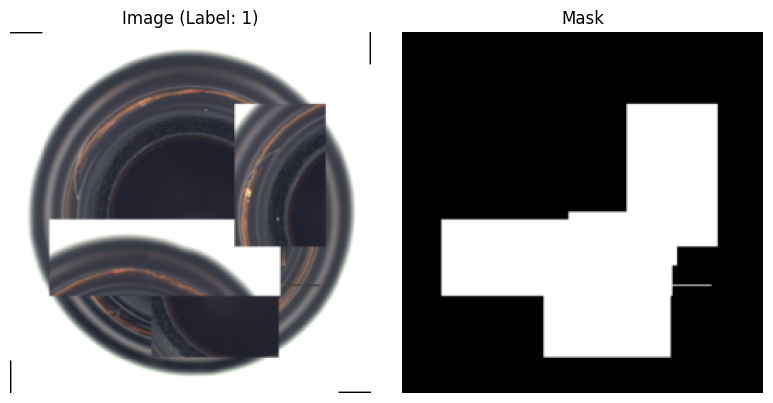

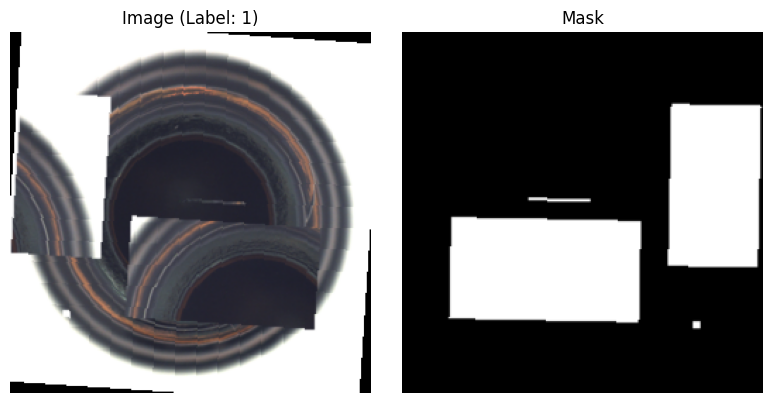

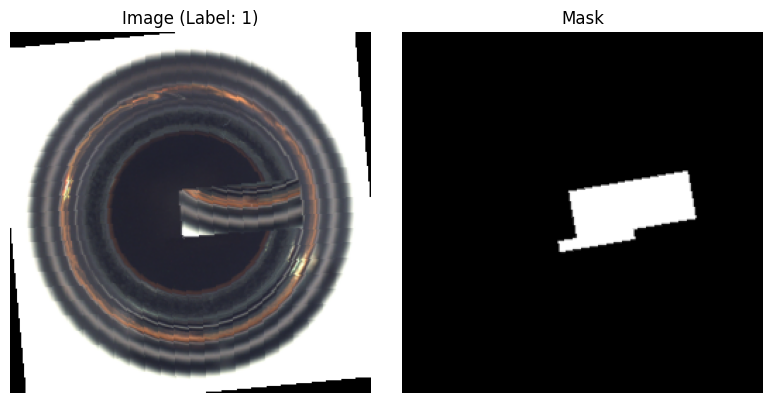

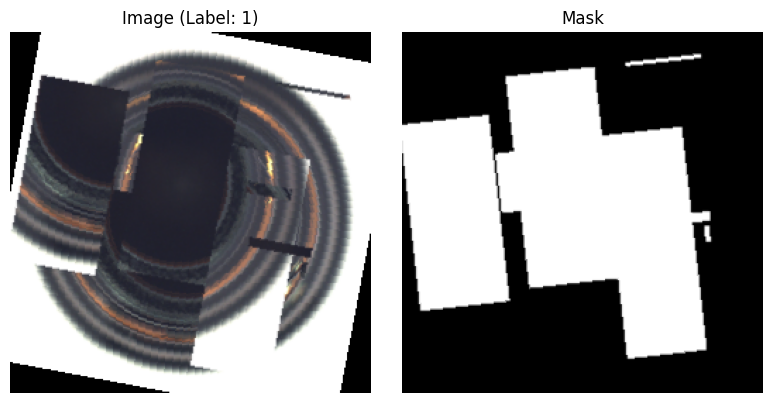

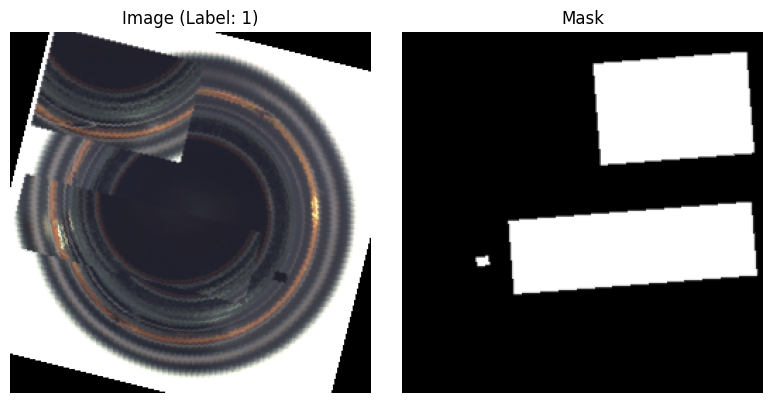

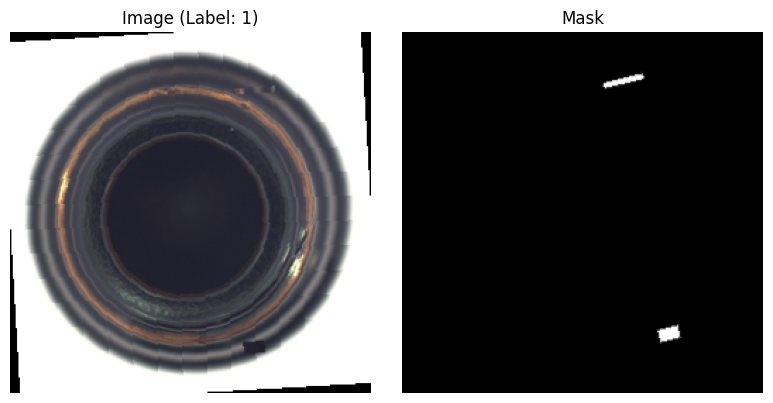

In [11]:
visualize_samples(dataset=dataset, num_samples=8)